# 6.5 UNSUPERVISED MACHINE LEARNING - CLUSTERING
** **
**SCRIPT CONTENTS:**

      1) IMPORTING LIBRARIES & FILES
      2) REVENUE ANALYSIS (USA and China)
          - Data Cleaning
          - The Elbow Technique
          - K-means cluserting
     
      3) INDUSTRY REVENUE ANALYSIS (Consumer Durables)
          - Data Cleaning
          - The Elbow Technique
          - K-means cluserting

      4) INTERPERTATION (CONCLUSION)
      5) EXPORTS

## IMPORTING LIBRARIES & FILES
** **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import plotly.express as px

In [2]:
# Command to prompts matplotlib visuals to appear in the notebook 

%matplotlib inline 

In [3]:
# Document File Location

path = r'C:\Users\G\03-2023 The World Largest Public Companies (Pre-Post Pandemic)'

In [4]:
# Import files

# Merged Dataset
dfgwth = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Clean Global Public Companies Growth Rate3.csv'), index_col = False)

# USA Dataset
usa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Aggregated USA.csv'), index_col = False)

# CHINA Dataset
chn = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Aggregated CHINA.csv'), index_col = False)

## REVENUE ANALYSIS
** **

The dataset contains a wide range of industry types from various countries. Due to the nature of the dataset, conducting a comprehensive global performance analysis may yield inconclusive results. Instead, the analysis will focus on the two countries with the largest count of public company performers to optimize the model's prediction accuracy and for comparative analysis.

In [5]:
# Dataset dimension for all dataframes

# Create a list of data frames
dfs = (('USA', usa), ('CHINA', chn))

# Iterate over the list and print the shape of each data frame
def printShapes(name, data):
    return f'Shape of {name} data: {data.shape}'

for name, data in dfs:
    print(printShapes(name, data))

Shape of USA data: (391, 11)
Shape of CHINA data: (299, 11)


In [6]:
# Chcking Missing Values for all dataframes

# Create a list of data frames
dfs = (('USA', usa), ('CHINA', chn))

# Iterate over the list and print the missing values of each dataframe
def printMissingValues(name, data):
    print(f'Missing Value Counts for {name} data:')
    print(data.isna().sum())
    print('\n')

for name, data in dfs:
    print(printMissingValues(name, data))

Missing Value Counts for USA data:
Year                   0
Country                0
Industry               0
Sales                  0
Assets                 0
Profits                0
Market Value           0
Sales Growth           0
Assets Growth          0
Profits Growth         0
Market Value Growth    0
dtype: int64


None
Missing Value Counts for CHINA data:
Year                   0
Country                0
Industry               0
Sales                  0
Assets                 0
Profits                0
Market Value           0
Sales Growth           0
Assets Growth          0
Profits Growth         0
Market Value Growth    0
dtype: int64


None


In [7]:
# Checking for Duplicate values for all dataframes

# Create a list of data frames
dfs = [('USA', usa), ('CHINA', chn)]

# Get the count of duplicate values for each row
def printDuplicateValues(name, data):
    duplicate_rows = data.duplicated()
    print(f'Duplicate Values for {name} data:')
    print('Duplicate rows in {}:'.format(len(data[data.duplicated()])))
    print(duplicate_rows.sum())
    print('\n')

# Iterate over the list and print the duplicate values of each dataframe
for name, data in dfs:
    printDuplicateValues(name, data)

Duplicate Values for USA data:
Duplicate rows in 0:
0


Duplicate Values for CHINA data:
Duplicate rows in 0:
0




**`USA LARGEST PUBLIC COMPANIES`**

In [8]:
# Dataset dimension 

usa.head(20)

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
0,2009,United States of America,Aerospace & Defense,238040,210110,12810,127690,8.042847,4.061215,-21.362799,-46.326187
1,2009,United States of America,Banking,513980,9504850,-21010,307770,-27.258060,-0.264113,-131.158238,-66.858700
2,2009,United States of America,Business Services & Supplies,143540,217720,5300,102850,-17.301377,-14.733297,-41.885965,-39.976656
3,2009,United States of America,Capital Goods,195700,206730,13210,82840,-0.553890,3.370169,-14.664083,-61.601928
4,2009,United States of America,Chemicals,215670,210370,15290,153590,18.944408,8.215021,11.850768,-48.890220
5,2009,United States of America,Conglomerates,379800,997780,34100,231040,6.979888,0.530977,-13.032390,-61.434843
6,2009,United States of America,Construction,86940,60410,-2570,28900,-21.321267,-36.383741,-38.072289,-58.590056
7,2009,United States of America,Consumer Durables,665410,664980,-21660,286580,-12.888487,-21.156719,27.787611,-42.286934
8,2009,United States of America,Diversified Financials,500670,5200060,-88320,443790,-31.317219,-32.639878,-299.233025,-54.645887
9,2009,United States of America,Drugs & Biotechnology,539320,538350,48090,633570,8.384244,7.087444,18.975755,-25.166541


In [9]:
# Dataset dimension 

usa.tail(20)

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
371,2022,United States of America,Construction,232199,225154,22486,261049,3.828526,-4.384680,56.817072,-19.957257
372,2022,United States of America,Consumer Durables,551746,809500,47167,2057813,-11.814469,-19.779366,26.680633,-0.571116
373,2022,United States of America,Diversified Financials,1070829,15631532,281591,3531781,12.553448,14.000841,61.623055,14.199514
374,2022,United States of America,Drugs & Biotechnology,1561635,1551931,136557,2773479,16.459360,6.806829,124.367843,13.199805
375,2022,United States of America,Food Markets,367500,133923,4481,121131,13.324494,4.587306,44.269156,24.946878
376,2022,United States of America,"Food, Drink & Tobacco",548237,799372,57422,1431480,7.258748,-18.916523,-2.914821,5.728942
377,2022,United States of America,Health Care Equipment & Services,345161,604062,50945,1295525,12.490019,5.947723,30.494365,-2.835455
378,2022,United States of America,"Hotels, Restaurants & Leisure",131831,343720,-311,546481,20.467318,-6.112058,-98.178837,-18.945108
379,2022,United States of America,IT Software & Services,902299,1600521,218909,5997883,25.709003,11.794067,46.364767,-15.417380
380,2022,United States of America,Insurance,949974,3673566,82700,1219609,5.725234,-2.593096,43.656198,14.986942


In [10]:
# Removing irrelevant columns for SALES vs. PROFITS

usa2 = usa.drop(columns = ['Country', 'Industry'])
usa2

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
0,2009,238040,210110,12810,127690,8.042847,4.061215,-21.362799,-46.326187
1,2009,513980,9504850,-21010,307770,-27.258060,-0.264113,-131.158238,-66.858700
2,2009,143540,217720,5300,102850,-17.301377,-14.733297,-41.885965,-39.976656
3,2009,195700,206730,13210,82840,-0.553890,3.370169,-14.664083,-61.601928
4,2009,215670,210370,15290,153590,18.944408,8.215021,11.850768,-48.890220
...,...,...,...,...,...,...,...,...,...
386,2022,737785,815222,138872,3267830,19.357772,0.998686,59.898676,11.466502
387,2022,318836,967347,44819,405715,-5.087430,3.250641,251.576718,-24.016294
388,2022,192400,107614,6217,123088,35.084849,69.703373,113.203018,34.731496
389,2022,424839,580462,33389,676383,34.207434,1.475290,-332.675958,-9.373463


In [11]:
# Defining the range of potential clusters in the data
num_cl = range(1, 10) 

# Defining k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [12]:
# Creating a parameters that represents a rate of variation for the given cluster option

prmtrs = [kmeans[i].fit(usa2).score(usa2) for i in range(len(kmeans))] 
prmtrs

C:\Users\G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[-3102196806246156.0,
 -632742831667814.1,
 -414507163152006.75,
 -288388866920149.5,
 -225806570637467.22,
 -164778964274717.3,
 -134584856712092.38,
 -114663203907900.06,
 -96873245100968.81]

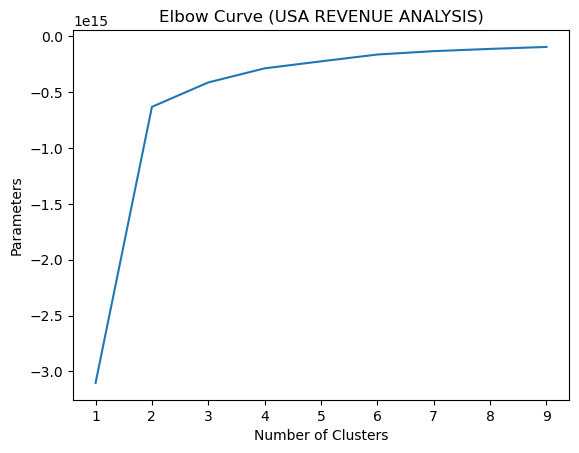

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,prmtrs)
pl.xlabel('Number of Clusters')
pl.ylabel('Parameters')
pl.title('Elbow Curve (USA REVENUE ANALYSIS)')
pl.show()

**NOTES:** The sharpest curve is at 2 in Number of Clusters, so for this modeling will use **`K = 2`**.

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2)

In [15]:
# Fit the k-means object to the data

kmeans.fit(usa2)

KMeans(n_clusters=2)

In [16]:
usa2['clusters'] = kmeans.fit_predict(usa2)

# Save DataFrame as CSV
usa2.to_csv('usa2_clusters2.csv', index=False)

usa2.head(20)

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth,clusters
0,2009,238040,210110,12810,127690,8.042847,4.061215,-21.362799,-46.326187,0
1,2009,513980,9504850,-21010,307770,-27.258060,-0.264113,-131.158238,-66.858700,1
2,2009,143540,217720,5300,102850,-17.301377,-14.733297,-41.885965,-39.976656,0
3,2009,195700,206730,13210,82840,-0.553890,3.370169,-14.664083,-61.601928,0
4,2009,215670,210370,15290,153590,18.944408,8.215021,11.850768,-48.890220,0
5,2009,379800,997780,34100,231040,6.979888,0.530977,-13.032390,-61.434843,0
6,2009,86940,60410,-2570,28900,-21.321267,-36.383741,-38.072289,-58.590056,0
7,2009,665410,664980,-21660,286580,-12.888487,-21.156719,27.787611,-42.286934,0
8,2009,500670,5200060,-88320,443790,-31.317219,-32.639878,-299.233025,-54.645887,0
9,2009,539320,538350,48090,633570,8.384244,7.087444,18.975755,-25.166541,0


In [17]:
# Checking value counts per cluster 

usa2['clusters'].value_counts()

0    361
1     30
Name: clusters, dtype: int64

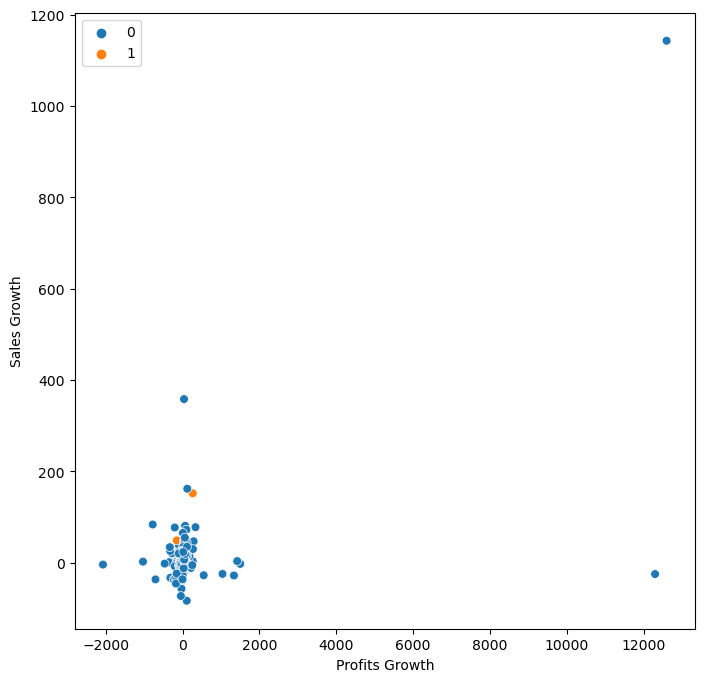

In [18]:
# Plot the clusters

plt.figure(figsize = (8,8))
ax1 = sns.scatterplot(x = usa2['Profits Growth'], y = usa2['Sales Growth'], hue = kmeans.labels_, s = 40) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax1.grid(False) # This removes the grid from the background.
plt.show()

In [19]:
usa2.loc[usa2['clusters'] == 1, 'clusters'] = 'orange'
usa2.loc[usa2['clusters'] == 0, 'clusters'] = 'blue'

In [20]:
# Descriptive cluster analysis

usaclstr = usa2.groupby('clusters').agg({'Year':['mean', 'median'],
                         'Sales':['mean', 'median'], 
                         'Assets':['mean', 'median'],
                         'Profits':['mean', 'median'],
                         'Market Value':['mean', 'median'],
                         'Sales Growth':['mean', 'median'],
                         'Assets Growth':['mean', 'median'],
                         'Profits Growth':['mean', 'median'],
                         'Market Value Growth':['mean', 'median']}).apply(lambda s: s.apply('{0:.2f}'.format))

usaclstr

Year               Sales                  Assets              \
             mean   median       mean     median         mean      median   
clusters                                                                    
blue      2015.43  2015.00  405320.91  294323.00    693489.86   534740.00   
orange    2016.57  2017.00  617409.97  578878.00  10100892.43  9740025.50   

           Profits           Market Value             Sales Growth         \
              mean    median         mean      median         mean median   
clusters                                                                    
blue      29072.13  23545.00    684206.22   477162.00         8.76   3.83   
orange    97560.73  92494.50   1463198.93  1212353.50         7.03   1.32   

         Assets Growth        Profits Growth        Market Value Growth         
                  mean median           mean median                mean median  
clusters                                                                        
blue             19.69   4.22          70.92   4.41               36.09  10.73  
orange           48.61   2.93          14.00   8.11               18.61  12.96

**`CHINA LARGEST PUBLIC COMPANIES`**

In [21]:
chn.head(20)

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
0,2009,China,Banking,190570,4080650,38480,551180,44.931173,29.436375,69.440775,-37.555372
1,2009,China,Capital Goods,40390,48660,2810,44470,287.619962,295.609756,279.729730,1.252277
2,2009,China,Construction,70530,77060,1820,54780,96.353007,109.402174,111.627907,-32.958022
3,2009,China,Consumer Durables,28540,29290,1660,17060,85.686402,48.831301,124.324324,-58.145240
4,2009,China,Diversified Financials,19440,86560,6360,69160,176.923077,206.298655,297.500000,-39.492563
5,2009,China,"Food, Drink & Tobacco",5310,5790,850,30860,175.129534,91.089109,39.344262,-31.725664
6,2009,China,IT Software & Services,1070,1600,340,25570,197.222222,175.862069,142.857143,124.890062
7,2009,China,Insurance,67260,283150,9230,138940,79.983944,62.040746,140.992167,-38.108602
8,2009,China,Materials,112620,148410,12840,154030,54.867987,64.279389,37.916219,-60.673526
9,2009,China,Oil & Gas Operations,270500,252160,28000,373650,21.382096,32.145477,10.891089,-50.122142


In [22]:
chn.tail(20)

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
279,2022,China,Conglomerates,26142,8568,-60,1213,100.891416,21.102473,-175.949367,-9.881129
280,2022,China,Construction,1840093,4774471,68534,369705,20.109647,8.769948,-10.575556,-27.118694
281,2022,China,Consumer Durables,447251,625955,22434,466387,31.602859,16.482966,25.708842,0.227151
282,2022,China,Diversified Financials,106855,1828856,24664,159131,-0.404515,11.586236,32.005994,-20.935767
283,2022,China,Drugs & Biotechnology,136834,129805,5548,223183,4.864890,-22.961648,4.580584,-43.411157
284,2022,China,"Food, Drink & Tobacco",134563,195456,20151,866051,19.724363,20.098066,-14.240116,-16.191587
285,2022,China,Health Care Equipment & Services,28003,26008,3628,91683,29.950346,26.979787,41.002721,-26.840887
286,2022,China,"Hotels, Restaurants & Leisure",9853,13223,990,17415,-20.751227,-12.337576,18.562874,-70.802247
287,2022,China,IT Software & Services,198866,498585,19728,705311,47.842572,33.987525,34.883085,-49.391059
288,2022,China,Insurance,554887,3245311,35958,223049,10.905755,11.866772,-6.651090,-35.845176


In [23]:
# Removing irrelevant columns for SALES vs. PROFITS

chn2 = chn.drop(columns = ['Country', 'Industry'])
chn2

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
0,2009,190570,4080650,38480,551180,44.931173,29.436375,69.440775,-37.555372
1,2009,40390,48660,2810,44470,287.619962,295.609756,279.729730,1.252277
2,2009,70530,77060,1820,54780,96.353007,109.402174,111.627907,-32.958022
3,2009,28540,29290,1660,17060,85.686402,48.831301,124.324324,-58.145240
4,2009,19440,86560,6360,69160,176.923077,206.298655,297.500000,-39.492563
...,...,...,...,...,...,...,...,...,...
294,2022,266289,360029,15303,216942,33.728895,8.056461,34.378293,-37.926831
295,2022,121311,193131,5680,59883,15.096917,4.925434,17.065128,-25.003757
296,2022,268919,130248,1818,12497,76.677463,39.176150,24.435318,29.462343
297,2022,267493,387166,8891,158460,49.966922,40.384350,214.725664,9.982093


In [24]:
# Defining the range of potential clusters in the data
num_cl2 = range(1, 10) 

# Defining k-means clusters in the range assigned above
kmeans2 = [KMeans(n_clusters = i) for i in num_cl2]

In [25]:
# Creating a parameters that represents a rate of variation for the given cluster option

prmtrs2 = [kmeans2[i].fit(chn2).score(chn2) for i in range(len(kmeans2))] 
prmtrs2

C:\Users\G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[-6020157035091155.0,
 -824007155831797.2,
 -394743942301162.94,
 -228208921047770.84,
 -153833396469922.22,
 -107648665660844.6,
 -82035456484751.02,
 -58644839663962.58,
 -47080695300907.09]

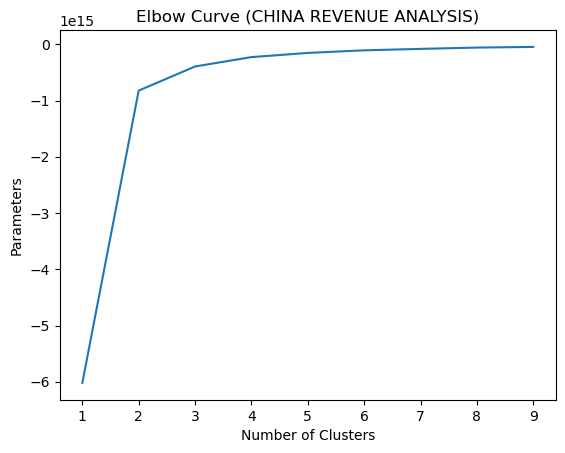

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl2,prmtrs2)
pl.xlabel('Number of Clusters')
pl.ylabel('Parameters')
pl.title('Elbow Curve (CHINA REVENUE ANALYSIS)')
pl.show()

**NOTES:** The sharpest curve is at 2, so for this modeling will use **`K = 2`**.

In [27]:
# Create the k-means object.

kmeans2 = KMeans(n_clusters = 2)

In [28]:
# Fit the k-means object to the data

kmeans2.fit(chn2)

KMeans(n_clusters=2)

In [29]:
chn2['clusters'] = kmeans2.fit_predict(chn2)
chn2.head(20)

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth,clusters
0,2009,190570,4080650,38480,551180,44.931173,29.436375,69.440775,-37.555372,0
1,2009,40390,48660,2810,44470,287.619962,295.609756,279.729730,1.252277,0
2,2009,70530,77060,1820,54780,96.353007,109.402174,111.627907,-32.958022,0
3,2009,28540,29290,1660,17060,85.686402,48.831301,124.324324,-58.145240,0
4,2009,19440,86560,6360,69160,176.923077,206.298655,297.500000,-39.492563,0
5,2009,5310,5790,850,30860,175.129534,91.089109,39.344262,-31.725664,0
6,2009,1070,1600,340,25570,197.222222,175.862069,142.857143,124.890062,0
7,2009,67260,283150,9230,138940,79.983944,62.040746,140.992167,-38.108602,0
8,2009,112620,148410,12840,154030,54.867987,64.279389,37.916219,-60.673526,0
9,2009,270500,252160,28000,373650,21.382096,32.145477,10.891089,-50.122142,0


In [30]:
# Checking value counts per cluster 

chn2['clusters'].value_counts()

0    289
1     10
Name: clusters, dtype: int64

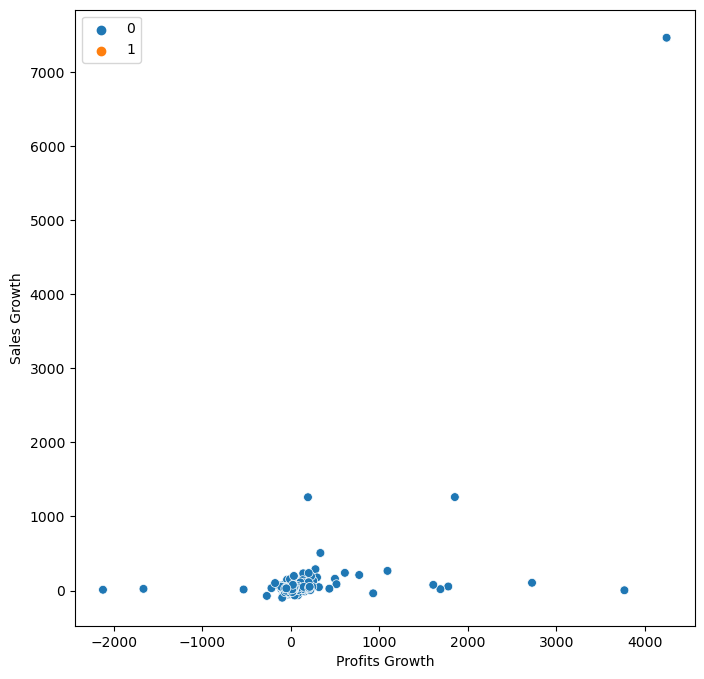

In [31]:
# Plot the clusters

plt.figure(figsize = (8,8))
ax2 = sns.scatterplot(x = chn2['Profits Growth'], y = chn2['Sales Growth'], hue = kmeans2.labels_, s = 40) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax2.grid(False) # This removes the grid from the background.
plt.show()

Both scatterplot illustrates similar results and appears to have no clear definiton on the cluster groupings, suggesting that there may be not enough evidence to show variations in trends.|

In [32]:
chn2.loc[chn2['clusters'] == 1, 'clusters'] = 'orange'
chn2.loc[chn2['clusters'] == 0, 'clusters'] = 'blue'

In [33]:
# Descriptive cluster analysis

chnclstr = chn2.groupby('clusters').agg({'Year':['mean', 'median'],
                         'Sales':['mean', 'median'], 
                         'Assets':['mean', 'median'],
                         'Profits':['mean', 'median'],
                         'Market Value':['mean', 'median'],
                         'Sales Growth':['mean', 'median'],
                         'Assets Growth':['mean', 'median'],
                         'Profits Growth':['mean', 'median'],
                         'Market Value Growth':['mean', 'median']}).apply(lambda s: s.apply('{0:.2f}'.format))

chnclstr

Year                Sales                   Assets               \
             mean   median        mean      median         mean       median   
clusters                                                                       
blue      2015.96  2016.00   156185.80    68209.00    423560.95    112397.00   
orange    2017.50  2017.50  1062285.30  1043706.00  23562716.20  23581625.00   

            Profits            Market Value             Sales Growth         \
               mean     median         mean      median         mean median   
clusters                                                                      
blue        9946.96    4606.00    173991.34   102043.00        68.75  21.00   
orange    223913.50  224295.00   1317425.50  1332421.50        14.76  10.49   

         Assets Growth        Profits Growth        Market Value Growth         
                  mean median           mean median                mean median  
clusters                                                                        
blue             57.45  23.30          91.77  22.26               59.90   7.06  
orange           14.27  13.35          11.72   5.85                4.73   0.44

## INDUSTRY PERFORMANCE ANALYSIS
** **

Let's narrow our focus to a specific industry and analyze its performance. In this model, we will explore the **`Consumer Durables`** sector, which comprises companies that specialize in selling consumer products with extended lifespans, thereby reducing the need for frequent purchases.

Consumer durables encompass a wide range of products, including large and small appliances, furniture, carpets, rubber tires, automotive batteries, consumer electronics, luggage, sporting goods, and household items. Additionally, durable goods within this industry also include automobiles, mobile homes, boats, and fine jewelry.

In [34]:
# Extracting Consumer Durables for USA Dataset

usa_cd = usa.loc[usa['Industry'] == 'Consumer Durables']
usa_cd

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
7,2009,United States of America,Consumer Durables,665410,664980,-21660,286580,-12.888487,-21.156719,27.787611,-42.286934
32,2010,United States of America,Consumer Durables,422190,534740,28420,485260,-36.551900,-19.585551,-231.209603,69.327936
57,2011,United States of America,Consumer Durables,764371,733077,46966,682289,81.049054,37.090362,65.256861,40.602770
85,2012,United States of America,Consumer Durables,813954,789820,64653,723217,6.486771,7.740387,37.659158,5.998631
115,2013,United States of America,Consumer Durables,837032,832752,51588,774648,2.835295,5.435669,-20.207879,7.111420
145,2014,United States of America,Consumer Durables,907414,911059,54487,969670,8.408520,9.403400,5.619524,25.175564
175,2015,United States of America,Consumer Durables,969948,974984,51753,1171325,6.891452,7.016560,-5.017711,20.796250
205,2016,United States of America,Consumer Durables,944564,1014556,59439,1143376,-2.617048,4.058733,14.851313,-2.386101
235,2017,United States of America,Consumer Durables,885250,1068015,58878,1135025,-6.279511,5.269202,-0.943825,-0.730381
266,2018,United States of America,Consumer Durables,880646,1074379,41680,1091369,-0.520079,0.595872,-29.209552,-3.846259


In [35]:
# Extracting Consumer Durables for China Dataset

chn_cd = chn.loc[chn['Industry'] == 'Consumer Durables']
chn_cd

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
3,2009,China,Consumer Durables,28540,29290,1660,17060,85.686402,48.831301,124.324324,-58.145240
21,2010,China,Consumer Durables,40180,36830,1380,52350,40.784863,25.742574,-16.867470,206.858148
38,2011,China,Consumer Durables,68222,63174,3808,92082,69.790941,71.528645,175.942029,75.896848
54,2012,China,Consumer Durables,156605,123651,7978,105913,129.552051,95.730839,109.506303,15.020308
75,2013,China,Consumer Durables,163887,133038,7784,107927,4.649915,7.591528,-2.431687,1.901561
96,2014,China,Consumer Durables,219712,216626,13344,154930,34.063104,62.830169,71.428571,43.550733
117,2015,China,Consumer Durables,252866,270297,18783,308027,15.089754,24.775881,40.759892,98.816885
139,2016,China,Consumer Durables,252425,280168,18157,212695,-0.174401,3.651909,-3.332801,-30.949235
161,2017,China,Consumer Durables,304734,358664,21984,302335,20.722591,28.017475,21.077270,42.144855
184,2018,China,Consumer Durables,397134,507283,26556,443831,30.321526,41.436832,20.796943,46.801065


In [36]:
# Dataset dimension for all dataframes

# Create a list of data frames
dfs = (('USA', usa_cd), ('CHINA', chn_cd))

# Iterate over the list and print the shape of each data frame
def printShapes(name, data):
    return f'Shape of {name} data: {data.shape}'

for name, data in dfs:
    print(printShapes(name, data))

Shape of USA data: (14, 11)
Shape of CHINA data: (14, 11)


In [37]:
# Chcking Missing Values for all dataframes

# Create a list of data frames
dfs = (('USA', usa_cd), ('CHINA', chn_cd))

# Iterate over the list and print the missing values of each dataframe
def printMissingValues(name, data):
    print(f'Missing Value Counts for {name} data:')
    print(data.isna().sum())
    print('\n')

for name, data in dfs:
    print(printMissingValues(name, data))

Missing Value Counts for USA data:
Year                   0
Country                0
Industry               0
Sales                  0
Assets                 0
Profits                0
Market Value           0
Sales Growth           0
Assets Growth          0
Profits Growth         0
Market Value Growth    0
dtype: int64


None
Missing Value Counts for CHINA data:
Year                   0
Country                0
Industry               0
Sales                  0
Assets                 0
Profits                0
Market Value           0
Sales Growth           0
Assets Growth          0
Profits Growth         0
Market Value Growth    0
dtype: int64


None


In [38]:
# Checking for Duplicate values for all dataframes

# Create a list of data frames
dfs = (('USA', usa_cd), ('CHINA', chn_cd))

# Get the count of duplicate values for each row
def printDuplicateValues(name, data):
    duplicate_rows = data.duplicated()
    print(f'Duplicate Values for {name} data:')
    print('Duplicate rows in {}:'.format(len(data[data.duplicated()])))
    print(duplicate_rows.sum())
    print('\n')

# Iterate over the list and print the duplicate values of each dataframe
for name, data in dfs:
    printDuplicateValues(name, data)

Duplicate Values for USA data:
Duplicate rows in 0:
0


Duplicate Values for CHINA data:
Duplicate rows in 0:
0




**`USA CONSUMER DURABLE INDUSTRY`**

In [39]:
# Removing irrelevant columns

usa_cd2 = usa_cd.drop(columns = ['Country', 'Industry'])
usa_cd2

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
7,2009,665410,664980,-21660,286580,-12.888487,-21.156719,27.787611,-42.286934
32,2010,422190,534740,28420,485260,-36.551900,-19.585551,-231.209603,69.327936
57,2011,764371,733077,46966,682289,81.049054,37.090362,65.256861,40.602770
85,2012,813954,789820,64653,723217,6.486771,7.740387,37.659158,5.998631
115,2013,837032,832752,51588,774648,2.835295,5.435669,-20.207879,7.111420
145,2014,907414,911059,54487,969670,8.408520,9.403400,5.619524,25.175564
175,2015,969948,974984,51753,1171325,6.891452,7.016560,-5.017711,20.796250
205,2016,944564,1014556,59439,1143376,-2.617048,4.058733,14.851313,-2.386101
235,2017,885250,1068015,58878,1135025,-6.279511,5.269202,-0.943825,-0.730381
266,2018,880646,1074379,41680,1091369,-0.520079,0.595872,-29.209552,-3.846259


In [40]:
# Defining the range of potential clusters in the data
num_cl3 = range(1, 10) 

# Defining k-means clusters in the range assigned above
kmeans3 = [KMeans(n_clusters = i) for i in num_cl3]

In [41]:
# Creating a parameters that represents a rate of variation for the given cluster option

prmtrs3 = [kmeans3[i].fit(usa_cd2).score(usa_cd2) for i in range(len(kmeans3))] 
prmtrs3

C:\Users\G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-3991331707207.794,
 -1531407885526.5837,
 -499915447607.2016,
 -234246047812.38898,
 -144900034906.86322,
 -85849907456.43239,
 -51887049288.94683,
 -29117353640.549355,
 -15776785823.016684]

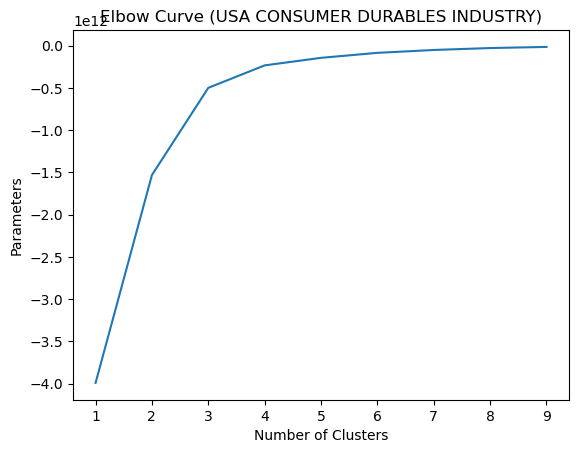

In [42]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl3,prmtrs3)
pl.xlabel('Number of Clusters')
pl.ylabel('Parameters')
pl.title('Elbow Curve (USA CONSUMER DURABLES INDUSTRY)')
pl.show()

There's 4 clusters, so will use **`K = 4`**

In [43]:
# Create the k-means object.

kmeans3 = KMeans(n_clusters = 4)

In [44]:
usa_cd2['clusters'] = kmeans3.fit_predict(usa_cd2)
usa_cd2.head(20)

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth,clusters
7,2009,665410,664980,-21660,286580,-12.888487,-21.156719,27.787611,-42.286934,3
32,2010,422190,534740,28420,485260,-36.551900,-19.585551,-231.209603,69.327936,3
57,2011,764371,733077,46966,682289,81.049054,37.090362,65.256861,40.602770,0
85,2012,813954,789820,64653,723217,6.486771,7.740387,37.659158,5.998631,0
115,2013,837032,832752,51588,774648,2.835295,5.435669,-20.207879,7.111420,0
145,2014,907414,911059,54487,969670,8.408520,9.403400,5.619524,25.175564,2
175,2015,969948,974984,51753,1171325,6.891452,7.016560,-5.017711,20.796250,2
205,2016,944564,1014556,59439,1143376,-2.617048,4.058733,14.851313,-2.386101,2
235,2017,885250,1068015,58878,1135025,-6.279511,5.269202,-0.943825,-0.730381,2
266,2018,880646,1074379,41680,1091369,-0.520079,0.595872,-29.209552,-3.846259,2


In [45]:
# Checking value counts per cluster 

usa_cd2['clusters'].value_counts()

2    7
0    3
3    2
1    2
Name: clusters, dtype: int64

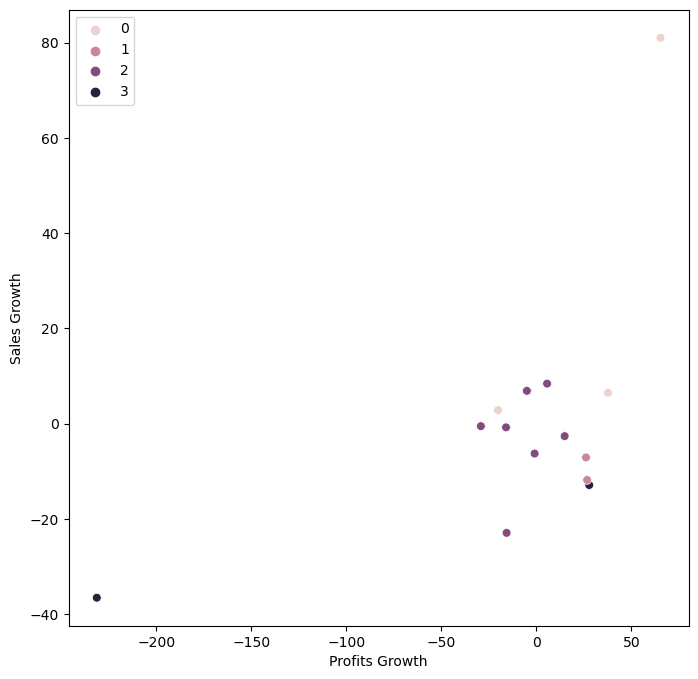

In [46]:
# Plot the clusters

plt.figure(figsize = (8,8))
ax3 = sns.scatterplot(x = usa_cd2['Profits Growth'], y = usa_cd2['Sales Growth'], hue = kmeans3.labels_, s = 40) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax3.grid(False) # This removes the grid from the background.
plt.show()

The groupings of the cluster overlaps which means that the data points may not have enough variations to detect variables relationships or trends.

In [47]:
usa_cd2.loc[usa_cd2['clusters'] == 3, 'clusters'] = 'dark purple'
usa_cd2.loc[usa_cd2['clusters'] == 2, 'clusters'] = 'light purple'
usa_cd2.loc[usa_cd2['clusters'] == 1, 'clusters'] = 'purple'
usa_cd2.loc[usa_cd2['clusters'] == 0, 'clusters'] = 'pink'

In [48]:
# Descriptive cluster analysis

usa_cd2clstr = usa_cd2.groupby('clusters').agg({'Year':['mean', 'median'],
                         'Sales':['mean', 'median'], 
                         'Assets':['mean', 'median'],
                         'Profits':['mean', 'median'],
                         'Market Value':['mean', 'median'],
                         'Sales Growth':['mean', 'median'],
                         'Assets Growth':['mean', 'median'],
                         'Profits Growth':['mean', 'median'],
                         'Market Value Growth':['mean', 'median']}).apply(lambda s: s.apply('{0:.2f}'.format))

# Save DataFrame as CSV
usa_cd2clstr.to_csv('usa2_clusters.csv', index=True)

usa_cd2clstr

Year               Sales                Assets             \
                 mean   median       mean     median       mean     median   
clusters                                                                     
dark purple   2009.50  2009.50  543800.00  543800.00  599860.00  599860.00   
light purple  2017.00  2017.00  848567.57  885250.00  994493.86  980230.00   
pink          2012.00  2012.00  805119.00  813954.00  785216.33  789820.00   
purple        2021.50  2021.50  588705.50  588705.50  909296.00  909296.00   

               Profits           Market Value             Sales Growth  \
                  mean    median         mean      median         mean   
clusters                                                                 
dark purple    3380.00   3380.00    385920.00   385920.00       -24.72   
light purple  47272.43  51753.00   1091651.57  1091369.00        -2.55   
pink          54402.33  51588.00    726718.00   723217.00        30.12   
purple        42200.00  42200.00   2063723.00  2063723.00        -9.46   

                     Assets Growth         Profits Growth           \
              median          mean  median           mean   median   
clusters                                                             
dark purple   -24.72        -20.37  -20.37        -101.71  -101.71   
light purple   -0.77          2.59    4.48          -6.62    -5.02   
pink            6.49         16.76    7.74          27.57    37.66   
purple         -9.46         -8.42   -8.42          26.39    26.39   

             Market Value Growth         
                            mean median  
clusters                                 
dark purple                13.52  13.52  
light purple                5.24  -0.73  
pink                       17.90   7.11  
purple                     46.80  46.80

**`CHINA CONSUMER DURABLE INDUSTRY`**

In [49]:
# Removing irrelevant columns

chn_cd2 = chn_cd.drop(columns = ['Country', 'Industry'])
chn_cd2

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
3,2009,28540,29290,1660,17060,85.686402,48.831301,124.324324,-58.145240
21,2010,40180,36830,1380,52350,40.784863,25.742574,-16.867470,206.858148
38,2011,68222,63174,3808,92082,69.790941,71.528645,175.942029,75.896848
54,2012,156605,123651,7978,105913,129.552051,95.730839,109.506303,15.020308
75,2013,163887,133038,7784,107927,4.649915,7.591528,-2.431687,1.901561
96,2014,219712,216626,13344,154930,34.063104,62.830169,71.428571,43.550733
117,2015,252866,270297,18783,308027,15.089754,24.775881,40.759892,98.816885
139,2016,252425,280168,18157,212695,-0.174401,3.651909,-3.332801,-30.949235
161,2017,304734,358664,21984,302335,20.722591,28.017475,21.077270,42.144855
184,2018,397134,507283,26556,443831,30.321526,41.436832,20.796943,46.801065


In [50]:
# Defining the range of potential clusters in the data
num_cl4 = range(1, 10) 

# Defining k-means clusters in the range assigned above
kmeans4 = [KMeans(n_clusters = i) for i in num_cl4]

In [51]:
# Creating a parameters that represents a rate of variation for the given cluster option

prmtrs4 = [kmeans4[i].fit(chn_cd2).score(chn_cd2) for i in range(len(kmeans4))] 
prmtrs4

C:\Users\G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-1041559792989.9973,
 -278409537427.5293,
 -116907912389.90234,
 -65501802830.61054,
 -38679845927.8171,
 -27292882557.52738,
 -17823860195.677998,
 -13590009123.287348,
 -9789936023.066439]

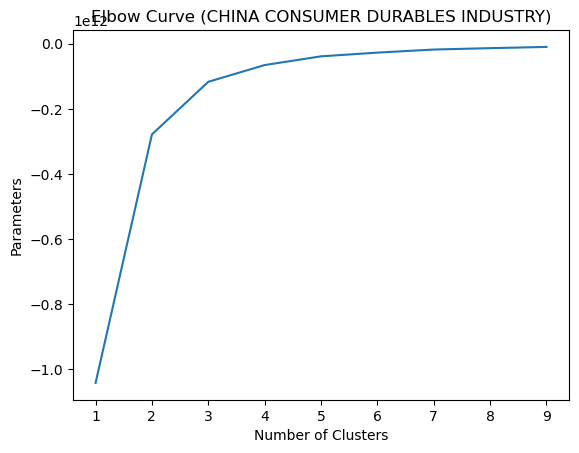

In [52]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl4,prmtrs4)
pl.xlabel('Number of Clusters')
pl.ylabel('Parameters')
pl.title('Elbow Curve (CHINA CONSUMER DURABLES INDUSTRY)')
pl.show()

There's 3 clusters, so will use **`K = 3`**

In [53]:
# Create the k-means object.

kmeans4 = KMeans(n_clusters = 3)

In [54]:
chn_cd2['clusters'] = kmeans4.fit_predict(chn_cd2)
chn_cd2.head(20)

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth,clusters
3,2009,28540,29290,1660,17060,85.686402,48.831301,124.324324,-58.145240,2
21,2010,40180,36830,1380,52350,40.784863,25.742574,-16.867470,206.858148,2
38,2011,68222,63174,3808,92082,69.790941,71.528645,175.942029,75.896848,2
54,2012,156605,123651,7978,105913,129.552051,95.730839,109.506303,15.020308,2
75,2013,163887,133038,7784,107927,4.649915,7.591528,-2.431687,1.901561,2
96,2014,219712,216626,13344,154930,34.063104,62.830169,71.428571,43.550733,0
117,2015,252866,270297,18783,308027,15.089754,24.775881,40.759892,98.816885,0
139,2016,252425,280168,18157,212695,-0.174401,3.651909,-3.332801,-30.949235,0
161,2017,304734,358664,21984,302335,20.722591,28.017475,21.077270,42.144855,0
184,2018,397134,507283,26556,443831,30.321526,41.436832,20.796943,46.801065,1


In [55]:
# Checking value counts per cluster 

chn_cd2['clusters'].value_counts()

0    6
2    5
1    3
Name: clusters, dtype: int64

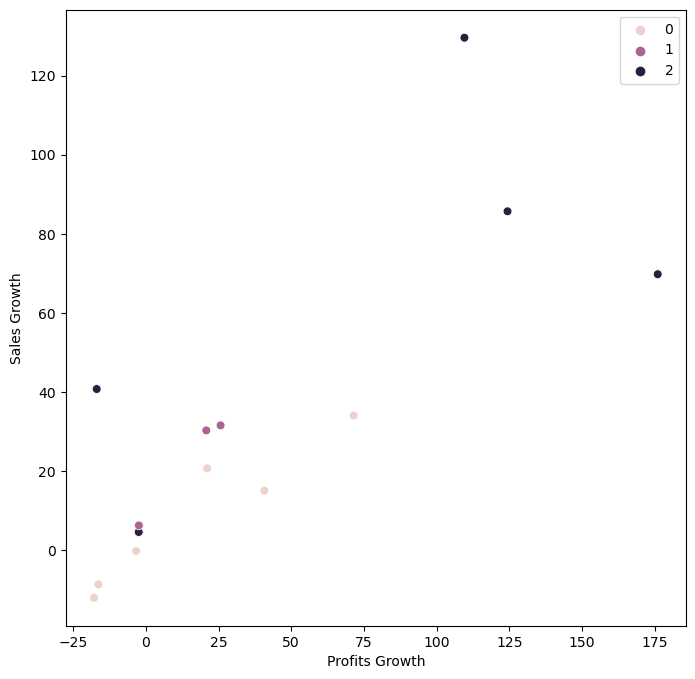

In [56]:
# Plot the clusters

plt.figure(figsize = (8,8))
ax4 = sns.scatterplot(x = chn_cd2['Profits Growth'], y = chn_cd2['Sales Growth'], hue = kmeans4.labels_, s = 40) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax4.grid(False) # This removes the grid from the background.
plt.show()

Similar to USA results, the cluster groupings doesn't have a clear divisions.

In [57]:
chn_cd2.loc[chn_cd2['clusters'] == 2, 'clusters'] = 'dark purple'
chn_cd2.loc[chn_cd2['clusters'] == 1, 'clusters'] = 'purple'
chn_cd2.loc[chn_cd2['clusters'] == 0, 'clusters'] = 'pink'

In [58]:
# Descriptive cluster analysis

chn_cd2clstr = usa_cd2.groupby('clusters').agg({'Year':['mean', 'median'],
                         'Sales':['mean', 'median'], 
                         'Assets':['mean', 'median'],
                         'Profits':['mean', 'median'],
                         'Market Value':['mean', 'median'],
                         'Sales Growth':['mean', 'median'],
                         'Assets Growth':['mean', 'median'],
                         'Profits Growth':['mean', 'median'],
                         'Market Value Growth':['mean', 'median']}).apply(lambda s: s.apply('{0:.2f}'.format))
chn_cd2clstr

Year               Sales                Assets             \
                 mean   median       mean     median       mean     median   
clusters                                                                     
dark purple   2009.50  2009.50  543800.00  543800.00  599860.00  599860.00   
light purple  2017.00  2017.00  848567.57  885250.00  994493.86  980230.00   
pink          2012.00  2012.00  805119.00  813954.00  785216.33  789820.00   
purple        2021.50  2021.50  588705.50  588705.50  909296.00  909296.00   

               Profits           Market Value             Sales Growth  \
                  mean    median         mean      median         mean   
clusters                                                                 
dark purple    3380.00   3380.00    385920.00   385920.00       -24.72   
light purple  47272.43  51753.00   1091651.57  1091369.00        -2.55   
pink          54402.33  51588.00    726718.00   723217.00        30.12   
purple        42200.00  42200.00   2063723.00  2063723.00        -9.46   

                     Assets Growth         Profits Growth           \
              median          mean  median           mean   median   
clusters                                                             
dark purple   -24.72        -20.37  -20.37        -101.71  -101.71   
light purple   -0.77          2.59    4.48          -6.62    -5.02   
pink            6.49         16.76    7.74          27.57    37.66   
purple         -9.46         -8.42   -8.42          26.39    26.39   

             Market Value Growth         
                            mean median  
clusters                                 
dark purple                13.52  13.52  
light purple                5.24  -0.73  
pink                       17.90   7.11  
purple                     46.80  46.80

## INTERPRETATION  (CONCLUSION)
** **

#### REVENUE ANALYSIS

`USA AND CHINA (Sales vs. Profit)`

The large concentration of data points in one cluster indicates a significant weighting in one cluster compared to the other, suggesting a dominant or prominent group within the dataset. Thus, the overlap or lack of distinct separation between the clusters implies that the data points are not clearly grouped or differentiated from each other.

Resulting to an inadequate fit to the prediction model and may not accurately capture the underlying patterns or relationships in the data. Given the limitations of the analysis, it is suggested that further information is necessary to better understand the revenue progress by country. This indicates the possibility of other variables or factors that influence the revenue progress and should be considered.


#### INDUSTRY PERFORMANCE ANALYSIS

`CONSUMBER DURABLES INDUSTRY`

The scatterplot results comparing Consumer Durables' revenue trends within a country did not show significant differences. This suggests that the specific factors related to each industry may not strongly influence the distribution of data points. It is possible that the analysis focused on industry-specific information but did not uncover any unique trends or relationships that stand out from the overall data of the country. To gain a better understanding of why the industries are not clearly differentiated, further investigation is required to identify any hidden patterns specific to each industry.